# Machine Learning
## Projekt „Employee-Churn“


### Ziel der Untersuchung

Wie hoch ist die aktuelle Wahrscheinlichkeit, dass ein Mitarbeiter in nächster Zeit kündigt?
Welche Spalte trägt wie stark zur Entscheidung des Mitarbeiters bei?
Kann man einen kündigungswilligen Mitarbeiter durch bestimmte Veränderungen dazu bewegen, seine Meinung zu ändern? (Spalten mit den größten Auswirkungen)


## Datenquelle

Die Daten stammen aus kaggle.com. [Link zu den Originaldaten](https://www.kaggle.com/hamzaben/employee-churn-model-w-strategic-retention-plan/data)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

## Datenbeschaffung

### Datei importieren

Die Daten sind nachher im Pandas-Dataframe *employee_df* enthalten.

In [18]:
employee_attrition_csv="Daten/Employee-Attrition.csv"
employee_df = pd.read_csv(employee_attrition_csv, parse_dates=True)

### Tabelleninformationen

In [19]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Die Zielspalte is **Attrition**, ein Ja/Nein Wert, der zeigt ob der/die jeweilige Mitarbeiter/in gekündigt hat.
Die restlichen Spalten stellen Eigenschaften wie persönliche Angaben (**Age**, **MaritalStatus**), Einkommensverhältnisse, Arbeitshistorie (**YearsAtCompany**) und ähnliche dar.



In [20]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Anzahl der unique-Werte der Spalten

Es ist interessant zu wissen, wieviele einzelne Werte in jeder Spalte auftauchen können. Die folgende Tabelle verschafft uns ein Überblick:

In [21]:
employee_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Nullwerte der Spalten
Wir prüfen, ob alle Zellen befüllt sind. Es gibt keine leere Zellen, wenn die Summen überall 0 sind. In dem Fall brauchen wir keinen Imputer oder Zeilen/Spalten zu löschen.

In [22]:
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Wir verschaffen uns noch Überblick über die statistische Eigenschaften der Daten:

In [23]:
print("NAME                         MINIMUM    MAXIMUM MITTELWERT     MEDIAN")
print("---------------------------------------------------------------------")
for i in employee_df.columns:
    if employee_df[i].dtype != "object":
        min = round(employee_df[i].min())
        max = round(employee_df[i].max())
        mean = round(employee_df[i].mean())
        medi = round(employee_df[i].median())
        print(f'{i:25} {min:10d} {max:10d} {mean:10d} {medi:10d} ')

NAME                         MINIMUM    MAXIMUM MITTELWERT     MEDIAN
---------------------------------------------------------------------
Age                               18         60         37         36 
DailyRate                        102       1499        802        802 
DistanceFromHome                   1         29          9          7 
Education                          1          5          3          3 
EmployeeCount                      1          1          1          1 
EmployeeNumber                     1       2068       1025       1020 
EnvironmentSatisfaction            1          4          3          3 
HourlyRate                        30        100         66         66 
JobInvolvement                     1          4          3          3 
JobLevel                           1          5          2          2 
JobSatisfaction                    1          4          3          3 
MonthlyIncome                   1009      19999       6503       4919 
MonthlyR

#### Verteilung MonthlyIncome

In [24]:
from1 = 0
for i in range(1,11):
    df = employee_df[employee_df['MonthlyIncome'].between(from1, i*2000)]
    print(f"{len(df):5} von {from1:5} bis {i*2000:5}")
    from1 = i*2000

   33 von     0 bis  2000
  510 von  2000 bis  4000
  372 von  4000 bis  6000
  175 von  6000 bis  8000
  100 von  8000 bis 10000
   86 von 10000 bis 12000
   53 von 12000 bis 14000
   16 von 14000 bis 16000
   57 von 16000 bis 18000
   69 von 18000 bis 20000


### Histogramme
#### Beobachtungen
* Manche Histogramme weisen einen nach links verschobenen Schwerpunkt, z. B. DistanceFromHome, TotalWorkingYears, PercentSalaryHike. Sind Datentransformationen notwendig, bevor man die Daten als Modell verwendet?

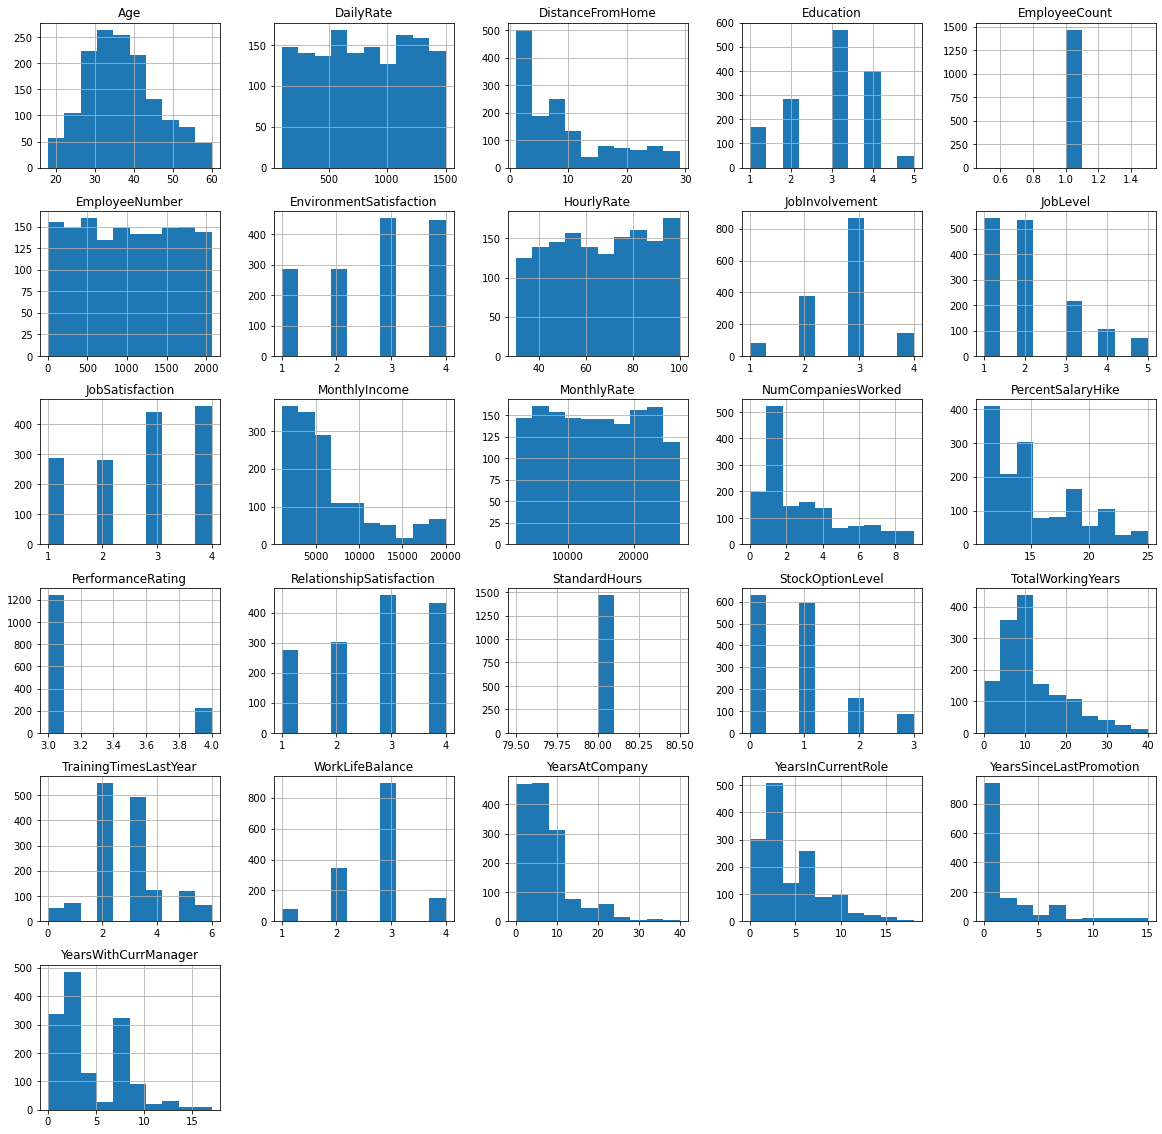

In [25]:
employee_df.hist(figsize=(20,20))
plt.show()

## Preprocessing

### Irrelevante Spalten löschen
* EmployeeNumber (interne Id, für Voraussage irrelevant)
* EmployeeCount (ist immer 1)
* Over18 (immer Yes)
* StandardHours (immer 80)

In [26]:
class IrrelevanteSpaltenLöschen(BaseEstimator, TransformerMixin):
    def __init__(self, zusätzliche_red_spalten=[]):
        self.irrelevante_spalten_ = zusätzliche_red_spalten
    
    def fit(self, X, y=None):
        for spalte in X.columns:
            print("nunique:", X.loc[:,spalte].nunique())
            if X.loc[:,spalte].nunique() < 2:
                self.irrelevante_spalten_.append(spalte)
        
        return self
    
    def transform(self, X):
        # Wir löschen nur die Spalten, die tatsächlich noch in den Daten vorhanden sind.
        rs_kopie = self.irrelevante_spalten_
        for rs in self.irrelevante_spalten_:
            if rs not in X.columns:
                rs_kopie.remove(rs)
        
        return X.drop(columns=self.irrelevante_spalten_)

In [27]:
redundante_spalten_löschen = IrrelevanteSpaltenLöschen(zusätzliche_red_spalten=['EmployeeNumber']).fit(employee_df)
print("redundante_spalten_:", redundante_spalten_löschen.irrelevante_spalten_)

# nicht redundant
employee_df = redundante_spalten_löschen.transform(employee_df)

nunique: 43
nunique: 2
nunique: 3
nunique: 886
nunique: 3
nunique: 29
nunique: 5
nunique: 6
nunique: 1
nunique: 1470
nunique: 4
nunique: 2
nunique: 71
nunique: 4
nunique: 5
nunique: 9
nunique: 4
nunique: 3
nunique: 1349
nunique: 1427
nunique: 10
nunique: 1
nunique: 2
nunique: 15
nunique: 2
nunique: 4
nunique: 1
nunique: 4
nunique: 40
nunique: 7
nunique: 4
nunique: 37
nunique: 19
nunique: 16
nunique: 18
redundante_spalten_: ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']


In [28]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Numerische von kategoriale Attribute trennen
Für die Vorverarbeitung brauchen wir eine Trennung zwischen nummerische und kategoriale Attribute. Es kann beispielsweise bei manchen Verfahren notwendig sein, nur nummerische Daten zu skalieren, aber nicht die kategoriale.

In [45]:
#spalten_nach_typ = employee_df.columns.to_series().groupby(employee_df.dtypes).groups
#Zu einem Dictionary mit String Keys konvertieren:

spalten_nach_typ={str(k): v for k, v in spalten_nach_typ.items()}

nummerische_attribute  = list(spalten_nach_typ['int64'])
kategoriale_attribute = list(spalten_nach_typ['object'])
print("nummerische_attribute:", nummerische_attribute)
print("kategoriale_attribute:", kategoriale_attribute)

nummerische_attribute: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
kategoriale_attribute: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


### Kategoriale Attributen kodieren
Kategoriale Attributen müssen in numerische Werte umgewandelt werden, damit sie bei den ML-Algorithmen benutzt werden können. Die den Kategorien entsprechende Werte sollten sinnvoll sortiert werden, z. B. **Travel_Rarely**, **Travel_Frequently** und **Non-Travel** sollten jeweils Kodierungen **1**, **2** und **0** bekommen und nicht **0**, **1**, **2** wie automatisch erteilt würde.

.

In [30]:
kategoriale_attribute_nach_index = []
kat_mappings = {}

for kat_attribut in kategoriale_attribute:
    uq_werte = employee_df.loc[:,kat_attribut].unique()
    print("Werte für", kat_attribut, ":", uq_werte)
    uq_dict = {k: v for v, k in enumerate(uq_werte)}
    kat_mappings[kat_attribut] = uq_dict

    kat_attribut_index = employee_df.columns.get_loc(kat_attribut)
    kategoriale_attribute_nach_index.append(kat_attribut_index)
    
print(kat_mappings)
print(kategoriale_attribute_nach_index)
print("Achtung! Spalte 1 ist unser Target (y). Das wird nachher in X gelöscht!")

Werte für Attrition : ['Yes' 'No']
Werte für BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Werte für Department : ['Sales' 'Research & Development' 'Human Resources']
Werte für EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Werte für Gender : ['Female' 'Male']
Werte für JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Werte für MaritalStatus : ['Single' 'Married' 'Divorced']
Werte für OverTime : ['Yes' 'No']
{'Attrition': {'Yes': 0, 'No': 1}, 'BusinessTravel': {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}, 'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, 'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}, 'Gender': {'Female': 0, 'Male': 1}, 

In [31]:
class KatAttributenEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.kat_mappings = {
            'Attrition': {'Yes': 1, 'No': 0},
            'BusinessTravel': {
                'Travel_Rarely': 1,
                'Travel_Frequently': 2,
                'Non-Travel': 0
            },
            'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2},
            'EducationField': {
                'Life Sciences': 1,
                'Other': 0,
                'Medical': 2,
                'Marketing': 3,
                'Technical Degree': 4,
                'Human Resources': 5
            },
            'Gender': {'Female': 0, 'Male': 1},
            'JobRole': {
                'Sales Executive': 0,
                'Research Scientist': 1,
                'Laboratory Technician': 2,
                'Manufacturing Director': 3,
                'Healthcare Representative': 4,
                'Manager': 5,
                'Sales Representative': 6,
                'Research Director': 7,
                'Human Resources': 8
            },
            'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
            'OverTime': {'Yes': 1, 'No': 0}
        }
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X1 = X
        
        for spalte in self.kat_mappings:
            kodierung = self.kat_mappings[spalte]
            X1 = X1.replace({spalte: kodierung})
            
        return X1

In [32]:
employee_df_encoded = KatAttributenEncoder().fit_transform(employee_df)

### Vorverarbeitete Tabellenstruktur

Ein Überblick über die Daten nach der Vorverarbeitung:

In [33]:
employee_df_encoded.info()

employee_df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.739456,9.192517,2.912925,1.819048,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.111811,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [34]:
print("Attrition=0:", employee_df_encoded['Attrition'].loc[employee_df_encoded['Attrition'] == 0].count())
print("Attrition=1:", employee_df_encoded['Attrition'].loc[employee_df_encoded['Attrition'] == 1].count())

Attrition=0: 1233
Attrition=1: 237


### Korrelationen zwischen den Spalten


In [35]:
cormat = employee_df_encoded.corr()
#print(cormat.info())
round(cormat,2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,-0.16,-0.01,0.01,0.03,-0.00,0.21,0.01,0.01,-0.04,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.16,1.00,0.13,-0.06,-0.06,0.08,-0.03,0.09,-0.10,0.03,...,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
BusinessTravel,-0.01,0.13,1.00,-0.02,0.00,-0.01,-0.01,-0.02,-0.01,-0.04,...,0.00,0.01,-0.03,0.01,0.02,0.00,0.01,-0.01,0.01,-0.00
DailyRate,0.01,-0.06,-0.02,1.00,-0.01,-0.00,-0.02,-0.02,0.02,-0.01,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
Department,0.03,-0.06,0.00,-0.01,1.00,-0.02,-0.01,-0.06,0.02,0.04,...,0.02,0.02,0.01,0.02,-0.04,-0.03,-0.02,-0.06,-0.04,-0.03
DistanceFromHome,-0.00,0.08,-0.01,-0.00,-0.02,1.00,0.02,0.02,-0.02,-0.00,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.03,-0.01,-0.02,-0.01,0.02,1.00,-0.01,-0.03,-0.02,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EducationField,0.01,0.09,-0.02,-0.02,-0.06,0.02,-0.01,1.00,-0.00,-0.01,...,-0.03,0.02,0.03,0.00,0.00,0.02,0.01,0.00,0.01,0.00
EnvironmentSatisfaction,0.01,-0.10,-0.01,0.02,0.02,-0.02,-0.03,-0.00,1.00,0.00,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
Gender,-0.04,0.03,-0.04,-0.01,0.04,-0.00,-0.02,-0.01,0.00,1.00,...,-0.01,0.02,0.01,-0.05,-0.04,-0.00,-0.03,-0.04,-0.03,-0.03


<AxesSubplot:>

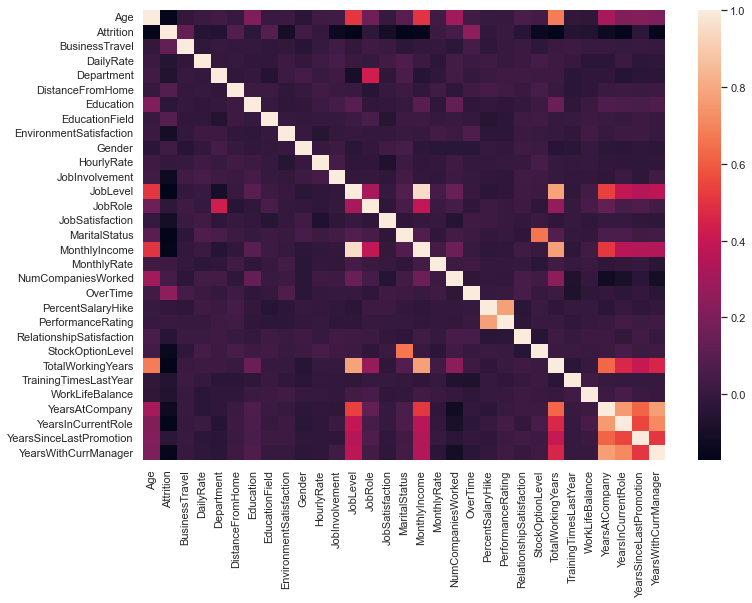

In [36]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cormat)

Gute korrelationen:
* JobLevel - Age
* JobLevel - MontlyIncome
* TotalWorkingYears - Age
* TotalWorkingYears - JobLevel
* TotalWorkingYears - MonthlyIncome

Und diese Gruppe:
* YearsAtCompany - YearsInCurrentRole - YearsWithCurrentManager

## Mehr Einsicht in die Daten
Man kann die Mitarbeiter/innen nach verschiedenen Kriterien zu gruppieren.

### Kündigungsbereitschaft nach Geschäftsreiseanteil

In [41]:
# Installation von cufflinks/iplot: https://stackoverflow.com/questions/65763648/dataframe-object-has-no-attribute-iplot
#!pip install cufflinks --upgrade
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=f7b316001bff804f40e4a58ba6d239c4cf60f292304de6fa3e024e3ce4cfaf64
  Stored in directory: c:\users\elibo\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [42]:
employee_df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [43]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(employee_df['BusinessTravel'].unique()):
    ratio = employee_df[(employee_df['BusinessTravel']==field)&(employee_df['Attrition']=="Yes")].shape[0] / employee_df[employee_df['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Kündigungsbereitschaft nach Reiseanteil (%)')

### Kündigungsbereitschaft nach Familienstand

In [40]:
#df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])


AttributeError: 'DataFrame' object has no attribute 'iplot'

### Kündigungsbereitschaft nach Jobtitel

In [26]:
#df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])


### Kündigungsbereitschaft nach Work-Life Balance

In [27]:
#df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])


## Zusammenfassende Beobachtungen
* Man erkennt, dass Mitarbeiter/innen, die häufiger Reisen auch mit größerer Wahrscheinlichkeit kündigen.


### Konvertierung zu Numpy Array
Wir konvertieren das Dataframe zu Numpy Array für weitere Verarbeitung.

In [28]:
employee_data = employee_df_encoded.to_numpy()
employee_data

array([[ 41,   1,   1, ...,   0,   5,  41],
       [ 49,   0,   2, ...,   1,   7, -49],
       [ 37,   1,   1, ...,   0,   0,  37],
       ...,
       [ 27,   0,   1, ...,   0,   3,  27],
       [ 49,   0,   2, ...,   0,   8, -49],
       [ 34,   0,   1, ...,   1,   2, -34]])

## Train-Test Split

In [29]:
X = np.delete(employee_data, 1, axis=1)
print(X)

y = employee_data[:,1]
print(y)

[[  41    1 1102 ...    0    5   41]
 [  49    2  279 ...    1    7  -49]
 [  37    1 1373 ...    0    0   37]
 ...
 [  27    1  155 ...    0    3   27]
 [  49    2 1023 ...    0    8  -49]
 [  34    1  628 ...    1    2  -34]]
[1 0 1 ... 0 0 0]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## ML

S. Employee_main.py